# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
There are 1850 rows and 8 columns in the orginal data.
- course_id, course_type, year,and enrollment_count fit data description 
- post_score have 185 missing values and replace these missing value with 0
- pre_requirement have 89 missing values and replace these missing value with 0
- pre_score have 130 incorrected values represented as '-' and replaced these values as 0, then converting pre_score as float
- set 'math' to be  'Mathematics' in department 
After validating data, the size of cleaned data remind unchanged. 

## Task 2
![image](p1.png)

![image](p4.png)

The distribution of enrollment count exhibits a non-normal pattern with two distinct peaks, indicating a bimodal distribution. This bimodality is primarily influenced by the course type, resulting in two prominent peaks located around enrollment count values of approximately 170 and 250. The two peaks suggest that course type plays a significant role in determining enrollment levels.

## Task 3
![image](p2.png)

The course type has two distinct values: classroom and online. The distribution of these two types of courses is imbalanced in the dataset. Especially, the online course shows a significantly higher count (1375), which is approximately 3 times higher than the count of classroom courses.

The variation in course type suggests a disparity in popularity or demand among learners. A higher count number of online courses indicates a higher preference. This might be due to the benefit of accessibility and flexibility offered by online class platforms.

## Task 4
![image](p3.png)

Based on the boxplot figure, the online class is more preferable than the classroom type. The conclusion can be drawn from the comparison of the range of boxplots on two-course types. 

The minimum value (the lower bar)of the boxplot for online is significantly higher than the maximum value (the upper bar) of the boxplot for classroom type. In other words,
the range of enrollment counts for online classes is higher than the range of the classroom type.

Understanding the relationship between course type and enrollment count, allows the University to address the unique characteristics and demands of each type. Developing relevant strategies to optimize resource allocations, and enhance the overall learning experience and enrollment.

## Task 5
The university is interested in predicting the number of enrollment in a course.
Therefore, predicting the number is a regression in this case.

## Task 6
![image](p5.png)

## Task 7
![image](p6.png)

## Task 8
The number of successful enrollments depends on a variety of factors. From the provided data, several features have the potential to impact enrollment numbers, including year, course type, department, pre_requirement, pre_score, and post_score. 

It is important to mention that the variation in enrollment depends on the university's policies, which are developed based on concurrent resource allocation and key performance indicators (KPIs) established for each year. These policies shape the overall enrollment landscape and contribute to the fluctuations in enrollment counts yearly.

The linear regression model does not fit well in this case due to the complex interconnection of multiple factors. However, tree-based offer a viable option for predicting enrollment counts. Decision tree and Randomforest tree are examples of tree-based models that can effectively complexities of enrollment dynamics throughout their hierarchical structures, to identify important features and better predictions.

## Task 9
![image](p8.png)

![image](p9.png)

The decision tree and random forest models identify the same top three important features: course_type, pre_requirement, and department_science. This indicates that these features have a significant impact on predicting enrollment count.

Both the decision tree and random forest models have excellent performance, with R2 scores of 0.99. The R2 score reflects how well the models explain the variation in the dependent variable (enrollment_count) based on the independent variables (features). In this project, both tree models can explain 99% of the variation in enrollment_count using the provided training features.

![image](p12.png)

Given that the university's primary goal is to predict enrollment count, minimizing the error between actual values and predicted values is crucial. To achieve this, hyperparameter tuning is performed to find the optimal parameters to improve model performance, specifically through the root mean square error (RMSE) metric.

Comparing the four models based on RMSE, the random forest model without hyperparameter tuning performs the best, as it has the lowest RMSE value. 

By considering the importance of the features, the high R2 score, and the optimal RMSE performance, the random forest model without hyperparameter tuning is the preferred choice for predicting enrollment count in this project.

## Task 10
![image](p12.png)

After evaluating the decision tree and random forest tree models without hyperparameter tuning on the validation set, the random forest tree model continues to have the lowest RMSE value. This suggests that the random forest tree model performs better in terms of minimizing the error between the predicted and actual values, even though both models have the same R2 scores.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

In [2]:
#load the data
df = pd.read_csv('university_enrollment_2306.csv')
data = df.copy()

In [3]:
#check the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   1761 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB


In [4]:
#check data describe
data.describe(include = 'all')

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
count,1850.000000,1850,1850.000000,1850.000000,1850,1665.000000,1761,1850
unique,NaN,2,NaN,NaN,1594,NaN,3,5
top,NaN,online,NaN,NaN,-,NaN,None,Technology
freq,NaN,1375,NaN,NaN,130,NaN,802,719
mean,925.500000,NaN,2016.423784,231.565405,NaN,75.204805,NaN,NaN
std,534.193317,NaN,3.448278,36.987029,NaN,8.511981,NaN,NaN
min,1.000000,NaN,2011.000000,154.000000,NaN,51.000000,NaN,NaN
25%,463.250000,NaN,2013.000000,185.000000,NaN,69.000000,NaN,NaN
50%,925.500000,NaN,2016.000000,251.000000,NaN,75.000000,NaN,NaN
75%,1387.750000,NaN,2019.000000,261.000000,NaN,81.000000,NaN,NaN


In [5]:
#check the first few row
data.head(2)

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science


In [6]:
#check course_type values
data['course_type'].unique()

array(['classroom', 'online'], dtype=object)

In [7]:
#replace - as 0
data ['pre_score'] = data ['pre_score'].apply(lambda x : x.strip().replace('-', '0'))

#convert pre_score as float  type
data ['pre_score'] = data ['pre_score'].astype('float')

In [8]:
#replace missing values of post_scores as 0
data['post_score'] = data['post_score'].fillna(0)

In [9]:
#fill na of pre_requirement as None
data ['pre_requirement'] =data ['pre_requirement'].fillna('None')

In [10]:
#check pre_requirement
data ['pre_requirement'].unique()

array(['Beginner', 'None', 'Intermediate'], dtype=object)

In [11]:
#check department value
data['department'].unique()

array(['Science', 'Mathematics', 'Technology', 'Math', 'Engineering'],
      dtype=object)

In [12]:
# set math to Mathematics
data.loc[data['department'] == 'Math', 'department']  = 'Mathematics'
data['department'].unique()

array(['Science', 'Mathematics', 'Technology', 'Engineering'],
      dtype=object)

In [13]:
#check data describe
data.describe(include = 'all')

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
count,1850.000000,1850,1850.000000,1850.000000,1850.000000,1850.000000,1850,1850
unique,NaN,2,NaN,NaN,NaN,NaN,3,4
top,NaN,online,NaN,NaN,NaN,NaN,None,Technology
freq,NaN,1375,NaN,NaN,NaN,NaN,891,719
mean,925.500000,NaN,2016.423784,231.565405,46.047022,67.684324,NaN,NaN
std,534.193317,NaN,3.448278,36.987029,30.555461,23.968697,NaN,NaN
min,1.000000,NaN,2011.000000,154.000000,0.000000,0.000000,NaN,NaN
25%,463.250000,NaN,2013.000000,185.000000,18.447500,67.000000,NaN,NaN
50%,925.500000,NaN,2016.000000,251.000000,45.450000,74.000000,NaN,NaN
75%,1387.750000,NaN,2019.000000,261.000000,72.525000,80.000000,NaN,NaN


## EDA

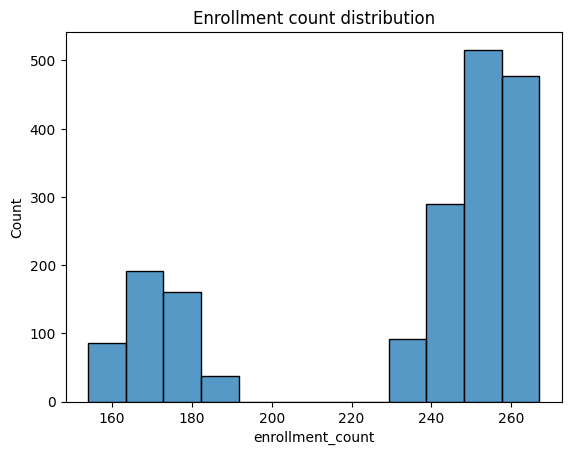

In [14]:
#check the distribution of enrollment counts
sns.histplot(
    data = data,
    x = 'enrollment_count'
)
plt.title('Enrollment count distribution')
plt.show()

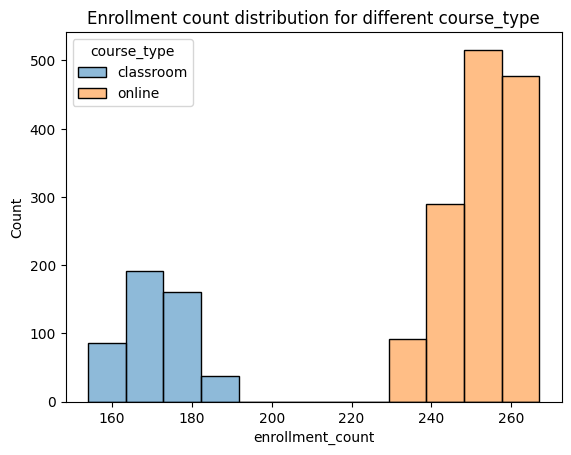

In [15]:
#check the distribution of enrollment counts
sns.histplot(
    data = data,
    x = 'enrollment_count',
    hue= 'course_type'
)
plt.title('Enrollment count distribution for different course_type')
plt.show()

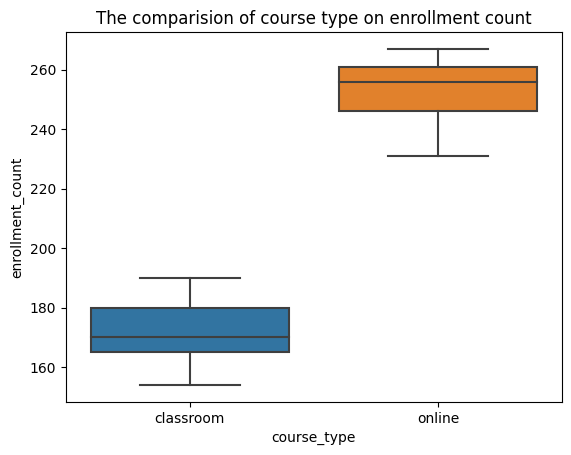

In [16]:
#check how course type varies enrollment count
sns.boxplot(

    data= data ,
    x = 'course_type',
    y = 'enrollment_count'
)
plt.title("The comparision of course type on enrollment count")
plt.show()

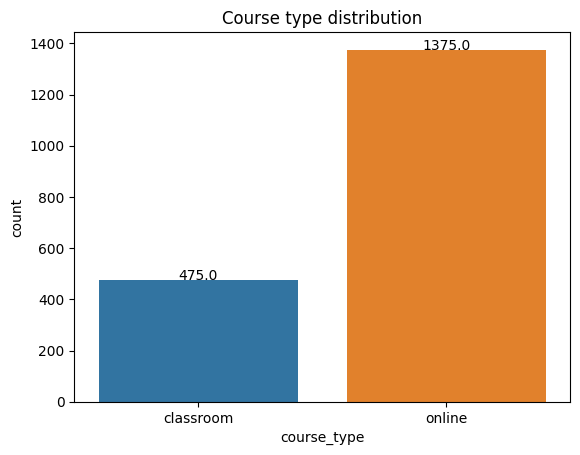

In [17]:
#check how many course of each type
fig = sns.countplot(
    data = data,
    x = 'course_type'
)

#label values 
for i in fig.patches:
    fig.annotate(str(i.get_height()), (i.get_x() + i.get_width()/2. ,i.get_height()), ha='center')

#titile
plt.title("Course type distribution")
plt.show()

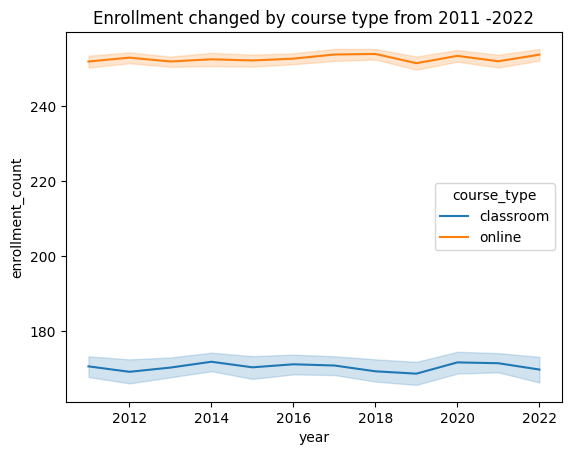

In [18]:
#explore how yearly change on enroullment based on department
sns.lineplot(
    data =data,
    x ='year',
    y = 'enrollment_count',
    hue = 'course_type'
)
plt.title("Enrollment changed by course type from 2011 -2022")
plt.show()

From year 2011 to year 2022, the enrollment of online courses are siginificantly higher than classroom couese every 

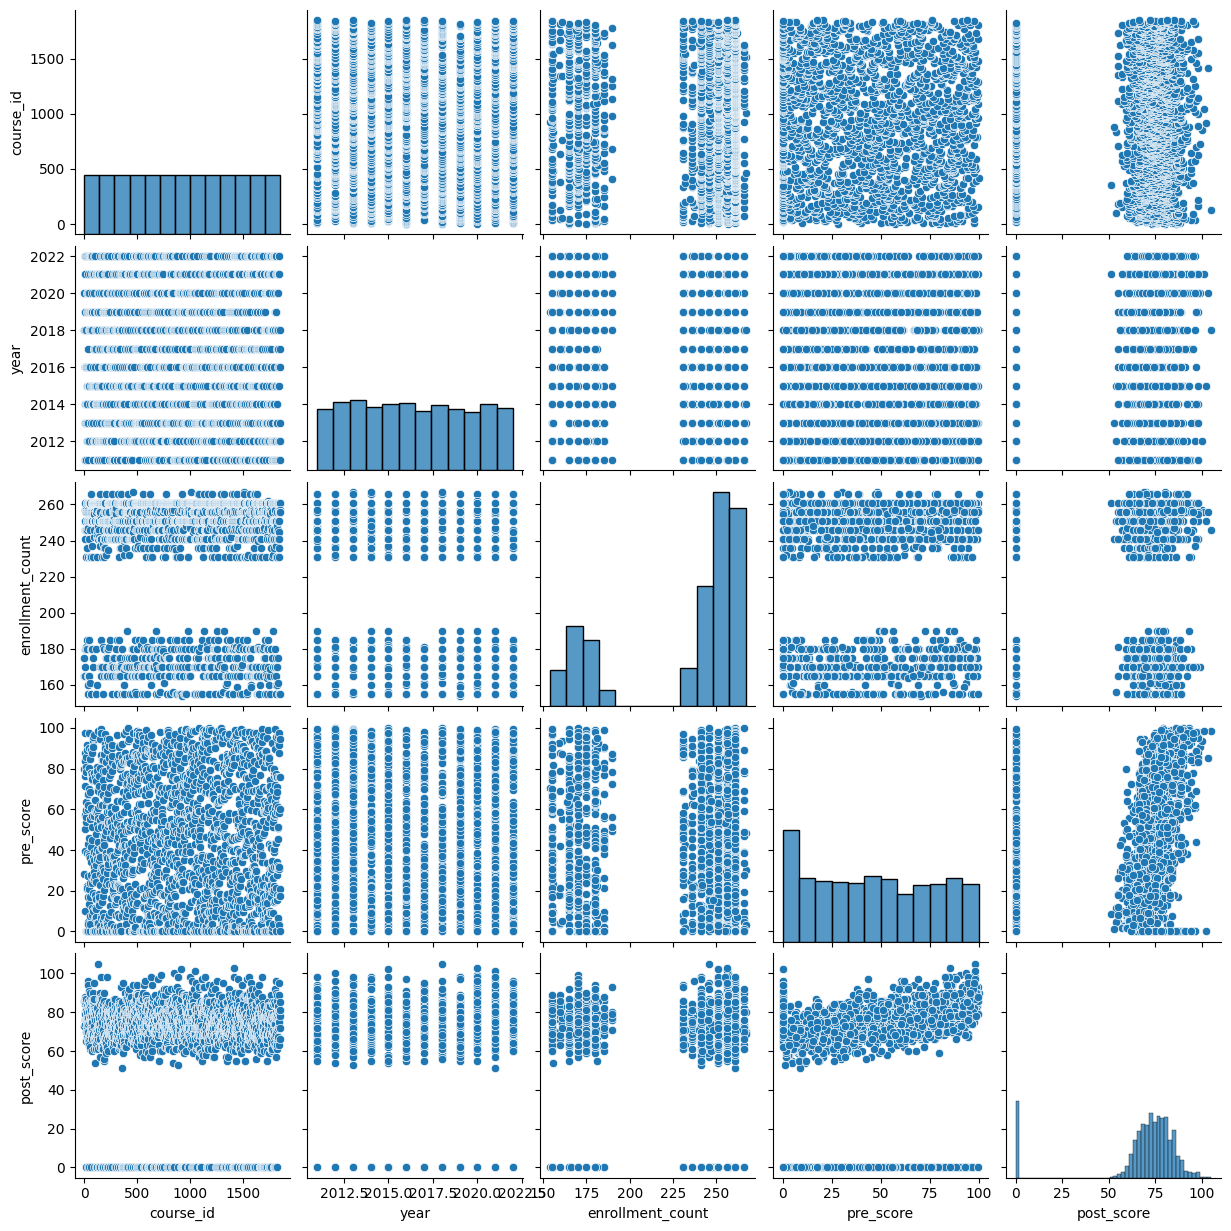

In [19]:
sns.pairplot(data)
plt.show()

The university wants to predict how many students will enroll in a course, the pairplot shows that enrollment count does not have any linear relationship with numerical values in the dataset. Therefore, tree-based models are likely to be the best option in this case

In [20]:
# a list of feature for dummy value
features = ['course_type', 'pre_requirement', 'department']
# drop the ID
df_cat = pd.get_dummies(data.drop(columns='course_id'), columns= features)

In [21]:
#get feature and targeted dataset as X , y 
X = df_cat.drop(columns='enrollment_count')
y = df_cat['enrollment_count']

#splt train, test, validate set
X_train, X_remin, y_train, y_remin= train_test_split(X,y, random_state= 1, test_size=0.3)
X_test, X_valid, y_test, y_valid = train_test_split(X_remin,y_remin, random_state= 1, test_size=0.5)

In [22]:
def plot_points(predict, name):
    """
    This function is for scatter ploting actual and predicting values
    The predicted value plot as blue
    The actual data plot as yellow
    args: 
        predict: predicted values
        name: the name of model
    """
    #plot predict values and actual values
    plt.figure()
    plt.scatter(x, predict, color = 'blue', label='predicted data')
    plt.scatter(x, y_test, color = 'yellow', label='actual data')
    plt.title("{} Regression".format(name))
    plt.xlabel("Data point")
    plt.ylabel("Targeted values")
    plt.legend()
    plt.show()

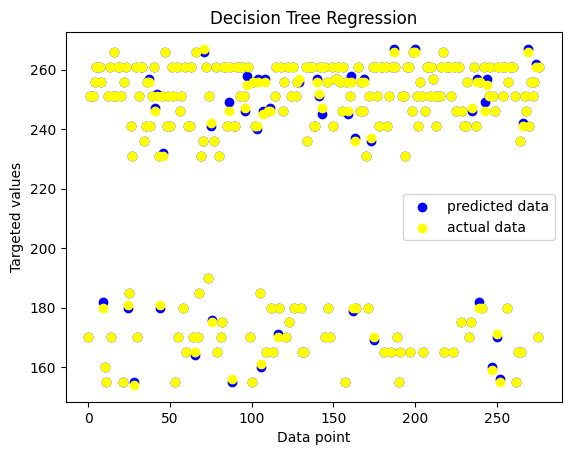

In [23]:
#create a decision tree without tuning hyperparamters
dt = DecisionTreeRegressor(random_state= 1)

#fit the data
dt.fit(X_train, y_train)

# predict data
dt_y = dt.predict(X_test)

#plot predict values and actual values
#create a list for x
x = [i for i in range(len(dt_y))]

plot_points(dt_y, "Decision Tree")

#print out the mse /r2
# print("Mean sqaured error: {}".format(mean_squared_error(y_test, dt_y)))
# print("R2 score: {}".format(r2_score(y_test, dt_y)))

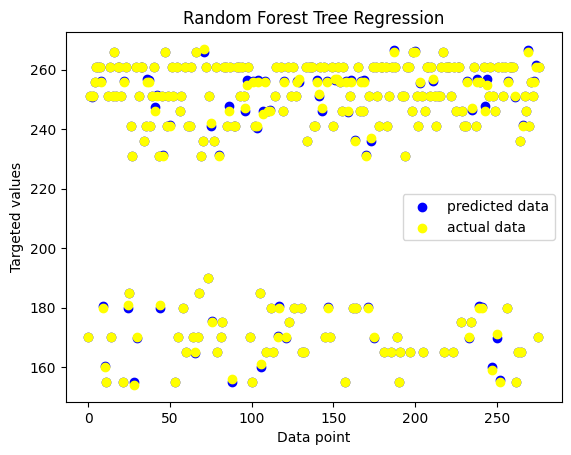

In [24]:
# apply Randomforest regression without tunning hyperparamter
rf = RandomForestRegressor(random_state= 1)

#fit the model
rf.fit(X_train, y_train)

#make prediction
rf_y = rf.predict(X_test)

#plot predict values and actual values
plot_points(rf_y, "Random Forest Tree")

#print out the mse /r2
# print("Mean sqaured error: {}".format(mean_squared_error(y_test, rf_y)))
# print("R2 score: {}".format(r2_score(y_test, rf_y)))

In [25]:
# tuning hypeparameter if there are any improvement on the dataset
dt_hyperparamters = {
    'criterion' : ['squared_error', 'absolute_error'],
    'max_depth' : [3, 4, 5],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2 ,3],
     'max_features': ['auto', 'sqrt']
}

#scoring
scoring = {'r2', 'neg_root_mean_squared_error'}

# create dt_cv
dt_cv = GridSearchCV(estimator= dt, param_grid=dt_hyperparamters, scoring=scoring, refit='neg_root_mean_squared_error' ,cv=4, n_jobs=-1,verbose= 1)

In [26]:
%time
#fit the df_cv
dt_cv.fit(X_train, y_train)

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 8.82 µs
Fitting 4 folds for each of 72 candidates, totalling 288 fits


GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3]},
             refit='neg_root_mean_squared_error',
             scoring={'neg_root_mean_squared_error', 'r2'}, verbose=1)

In [27]:
#validate the model
dt_tunned_y_v = dt_cv.best_estimator_.predict(X_valid)
#print out the mse /r2
print("Mean sqaured error: {}".format(mean_squared_error(y_valid, dt_tunned_y_v)))
print("R2 score: {}".format(r2_score(y_valid, dt_tunned_y_v)))

Mean sqaured error: 1.034534889577987
R2 score: 0.9992609269689514


In [28]:
# tuning hypeparameter if there are any improvement on the dataset
rf_hyperparamters = {
    'n_estimators': [50, 75, 100],
    'criterion' : ['squared_error', 'absolute_error'],
    'max_depth' : [3, 4, 5],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2 ,3],
    'max_features': ['auto', 'sqrt']
}

# create rf_cv
rf_cv = GridSearchCV(estimator= rf, param_grid=rf_hyperparamters, scoring=scoring, refit='neg_root_mean_squared_error' ,cv=4, n_jobs=-1,verbose= 1)

In [29]:
%time
rf_cv.fit(X_train,y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs
Fitting 4 folds for each of 216 candidates, totalling 864 fits


GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 75, 100]},
             refit='neg_root_mean_squared_error',
             scoring={'neg_root_mean_squared_error', 'r2'}, verbose=1)

In [30]:
#validate the model
rf_tunned_y_v = dt_cv.best_estimator_.predict(X_valid)
#print out the mse /r2
print("Mean sqaured error: {}".format(mean_squared_error(y_valid, rf_tunned_y_v)))
print("R2 score: {}".format(r2_score(y_valid, rf_tunned_y_v)))

Mean sqaured error: 1.034534889577987
R2 score: 0.9992609269689514


In [31]:
dt_tunned_y  =dt_cv.best_estimator_.predict(X_test)
rf_tunned_y = rf_cv.best_estimator_.predict(X_test)

In [32]:
#create a dataframe for comparing before and after tunning
scores = {
    'models': ['Decision Tree', 'RandomForest Tree', 'Tuned Decision Tree', 'Tuned RandomForest Tree'],
    'rmse': [mean_squared_error(y_test, dt_y), mean_squared_error(y_test, rf_y), mean_squared_error(y_test, dt_tunned_y), mean_squared_error(y_test, rf_tunned_y)],
    'r2': [r2_score(y_test, dt_y), r2_score(y_test, rf_y), r2_score(y_test, dt_tunned_y), r2_score(y_test, rf_tunned_y)]
}

df_score = pd.DataFrame(scores)
df_score

,models,rmse,r2
0,Decision Tree,0.310469,0.999775
1,RandomForest Tree,0.140592,0.999898
2,Tuned Decision Tree,0.855808,0.999381
3,Tuned RandomForest Tree,0.802198,0.999419


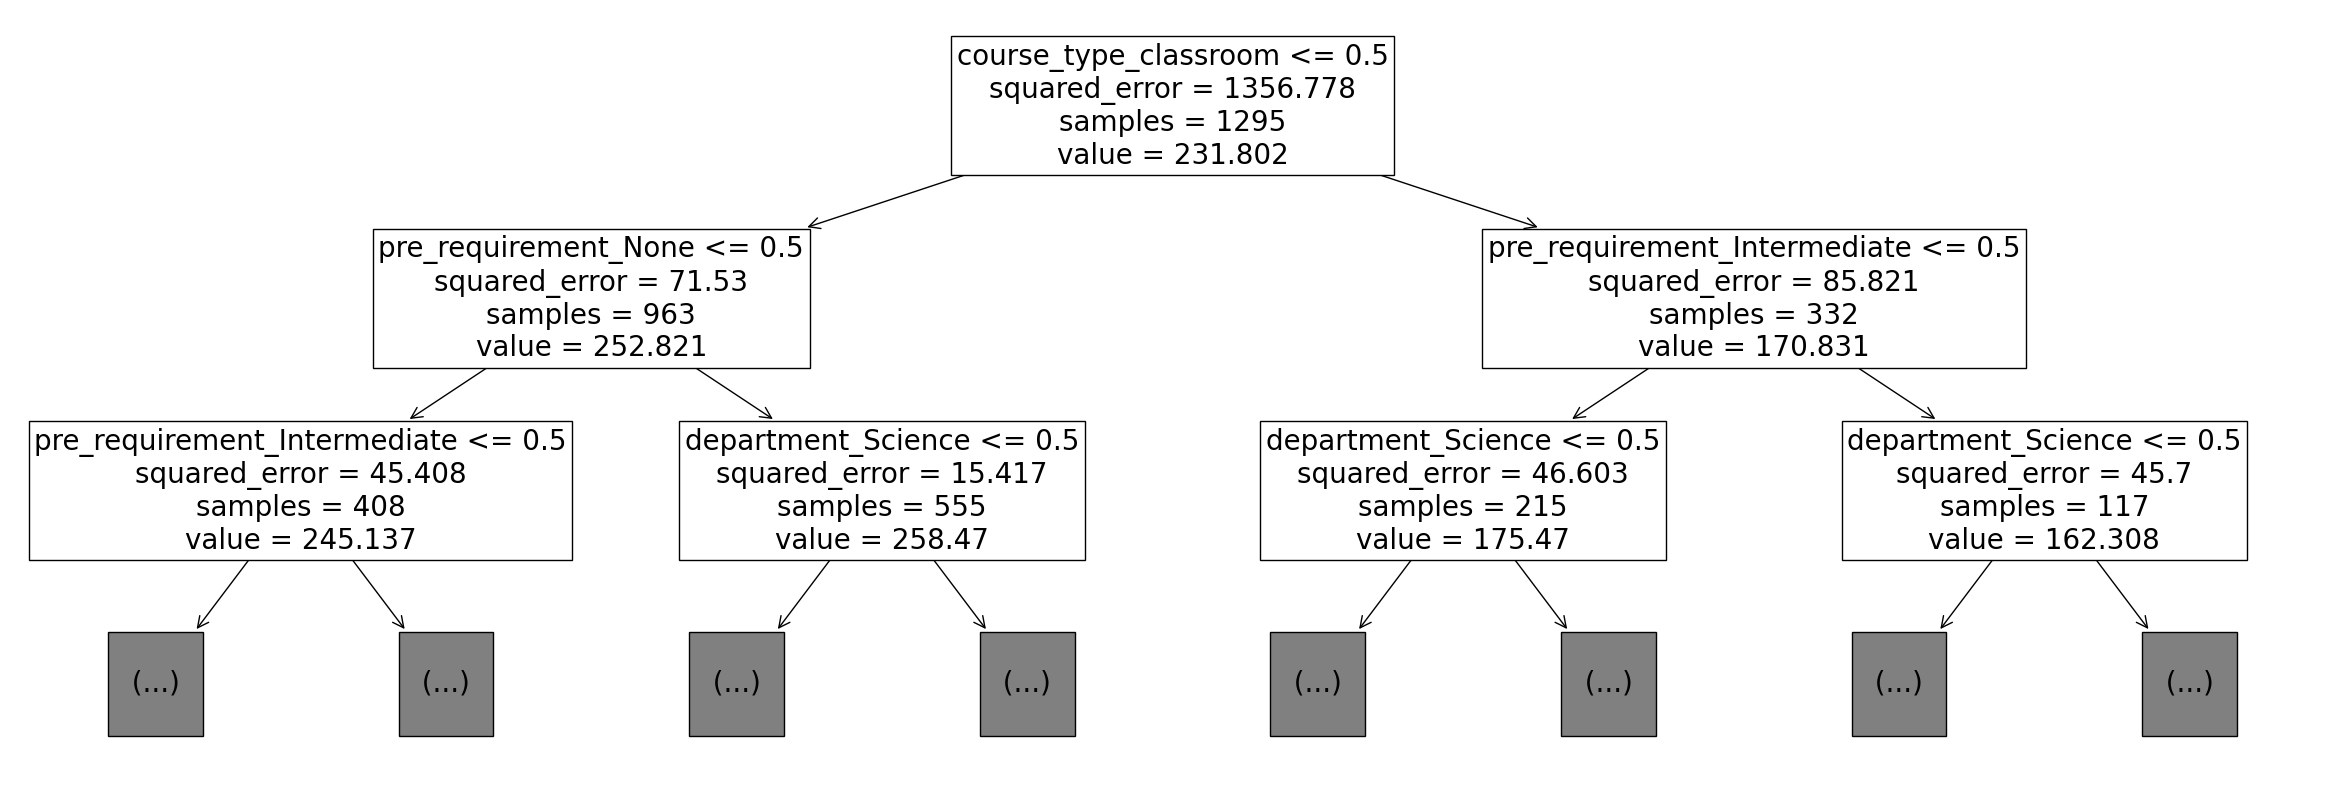

In [33]:
#visualize the decision tree
plt.figure(figsize=(30,10))
plot_tree(dt, feature_names=X.columns, class_names= 'enrollment_count', max_depth = 2,fontsize=20)
plt.show()

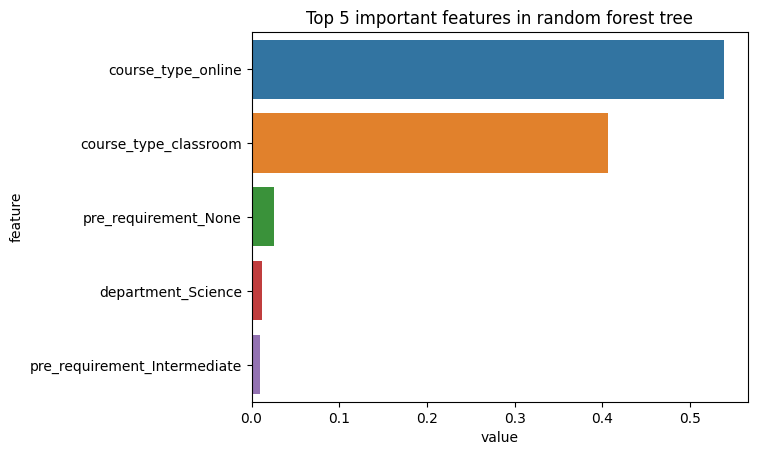

In [34]:
#visualize the randomforest tree
important_features  = pd.DataFrame({'feature':rf.feature_names_in_ , 'value':rf.feature_importances_})
sns.barplot(
    
    data = important_features.sort_values(by='value', ascending=False)[:5],
    x = 'value',
    y = 'feature'

)
plt.title("Top 5 important features in random forest tree")
plt.show()